### Titanic

In [50]:
# Importaciones clasicas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Visualizacion de datos perdidos o NaN
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Tratamiento de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de sets de datos
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
data_submission = pd.read_csv('datasets/gender_submission.csv')

In [3]:
# Visualizacion de datos para entrenamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S


In [4]:
# Tipos de datos
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Visualizaciond e columnas con datos nulos
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

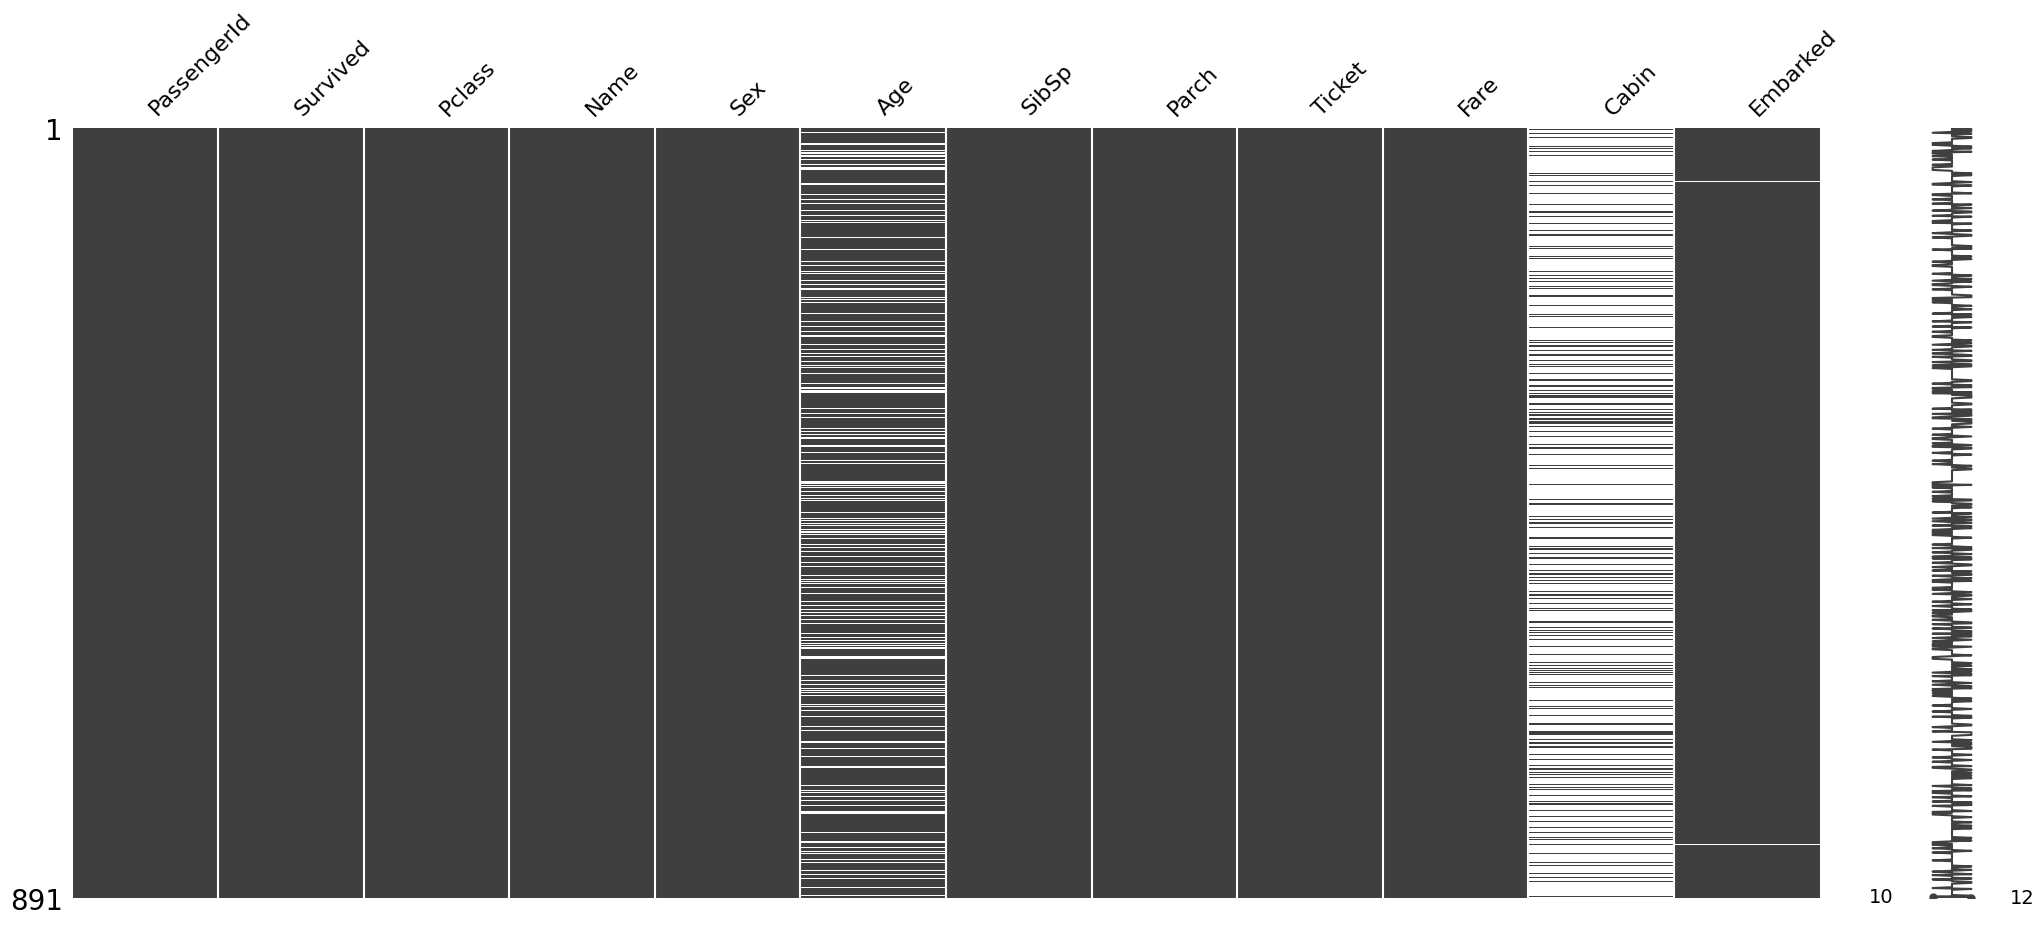

In [6]:
# Matris grafica de datos nulos
msngo.matrix(train_data)

<Axes: >

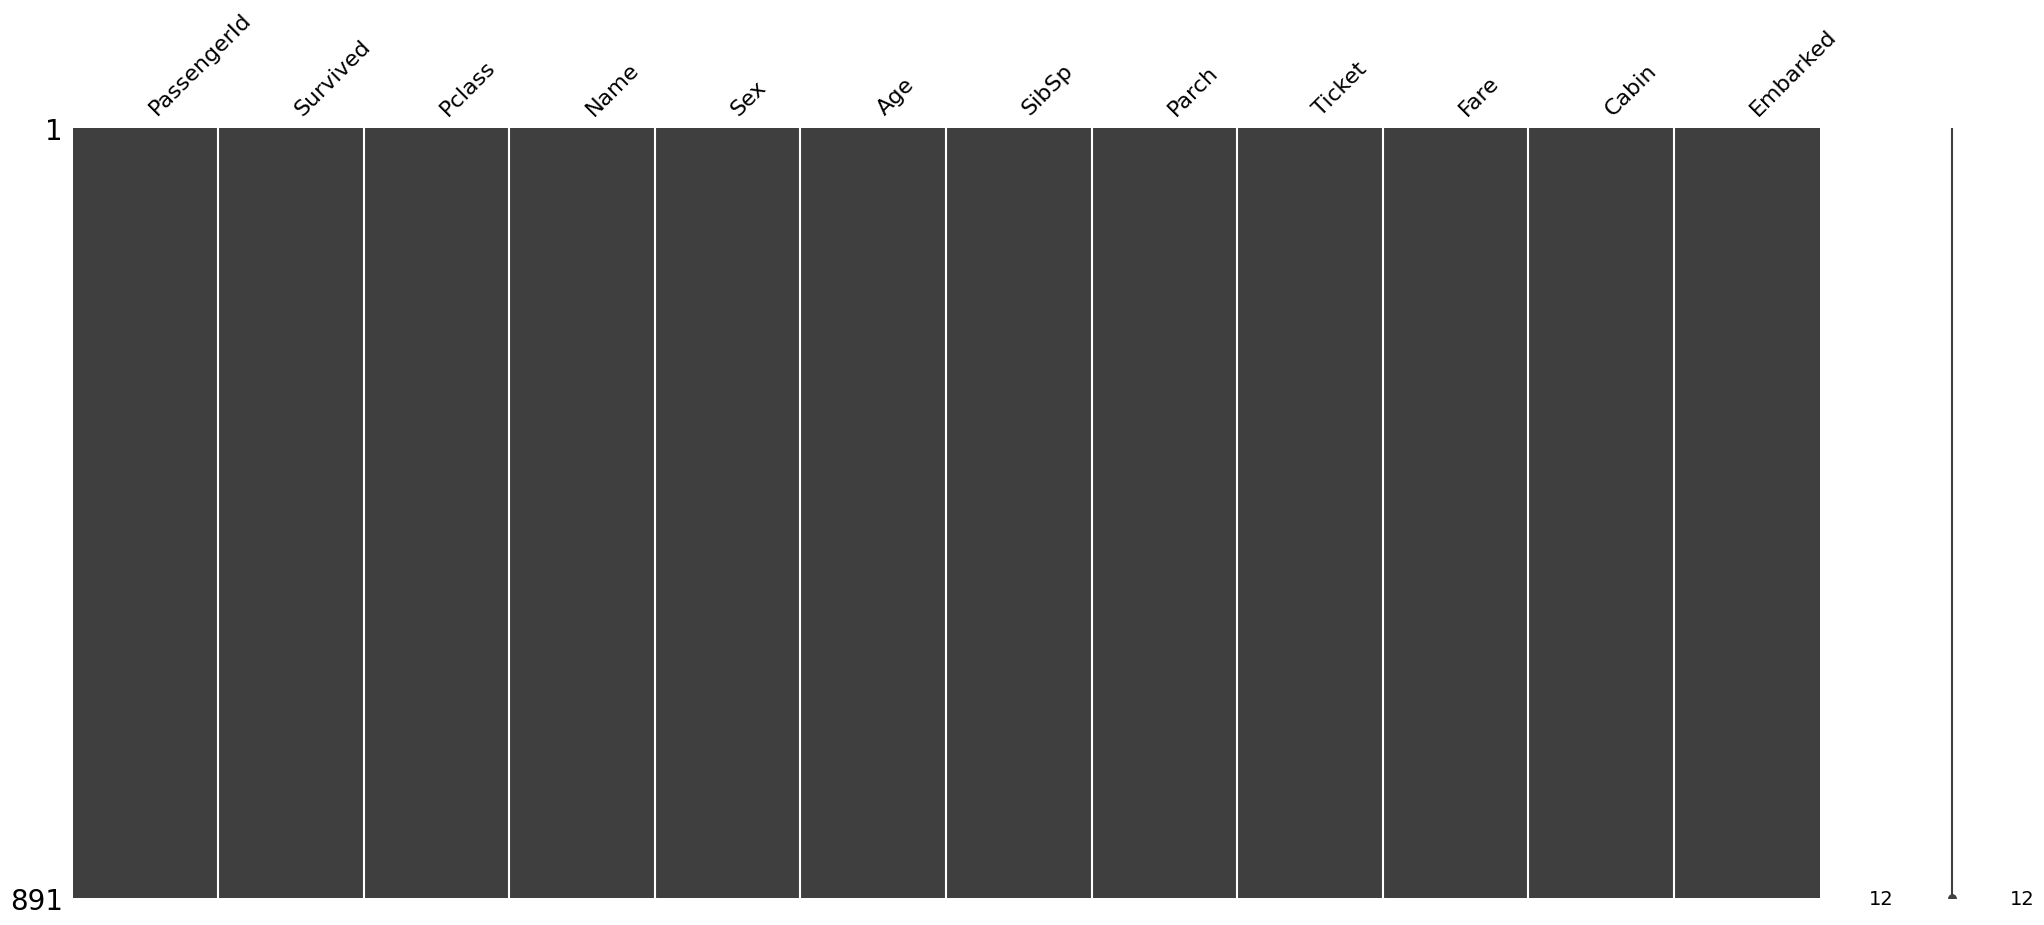

In [7]:
#Tratamiento de NaN, se transforman todos los NaN a 0
train_data["Age"] = train_data["Age"].fillna(0)
train_data["Cabin"] = train_data["Cabin"].fillna(0)
train_data["Embarked"] = train_data["Embarked"].fillna(0)
msngo.matrix(train_data)

In [8]:
# Visualizacion de dataset, se deben preparar dataset para modelamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,0.0,0,0,35852,7.7333,0,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,0,S
711,712,0,1,"Klaber, Mr. Herman",male,0.0,0,0,113028,26.5500,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,0,S


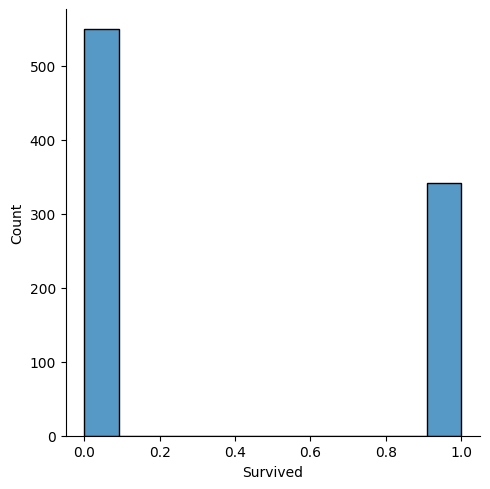

In [9]:
# Visualizacion de vector objetivo
sns.displot(data = train_data, x = "Survived")

<Axes: xlabel='Fare', ylabel='Count'>

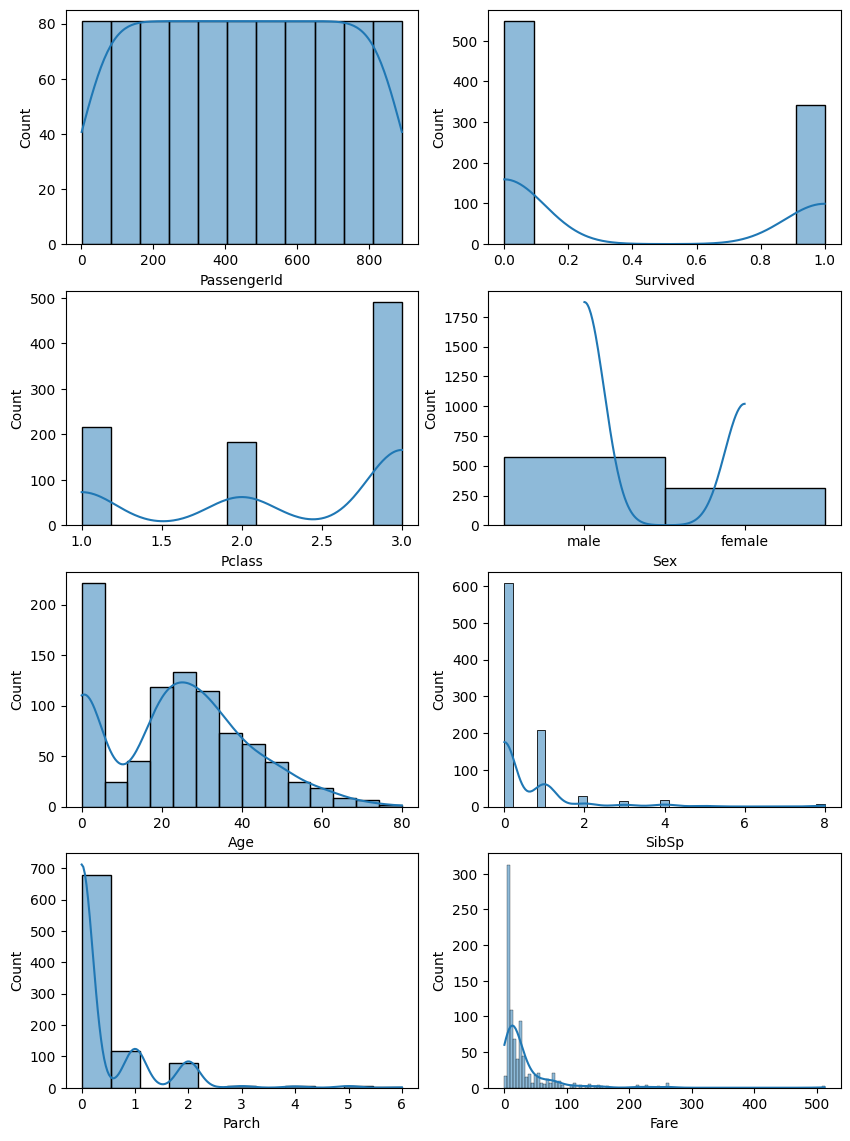

In [10]:

plt.rcParams["figure.figsize"] = (10,14)
#plt.axvline(x=train_data.PassengerId.mean(),color='red')
fig, axes = plt.subplots(4, 2)
sns.histplot(data = train_data, x = 'PassengerId', ax = axes[0,0], kde = True)
sns.histplot(data = train_data, x = 'Survived', ax = axes[0,1], kde = True)
sns.histplot(data = train_data, x = 'Pclass', ax = axes[1,0], kde = True)
sns.histplot(data = train_data, x = 'Sex', ax = axes[1,1], kde = True)
sns.histplot(data = train_data, x = 'Age', ax = axes[2,0], kde = True)
sns.histplot(data = train_data, x = 'SibSp', ax = axes[2,1], kde = True)
sns.histplot(data = train_data, x = 'Parch', ax = axes[3,0], kde = True)
sns.histplot(data = train_data, x = 'Fare', ax = axes[3,1], kde = True)

<Axes: xlabel='Sex', ylabel='Survived'>

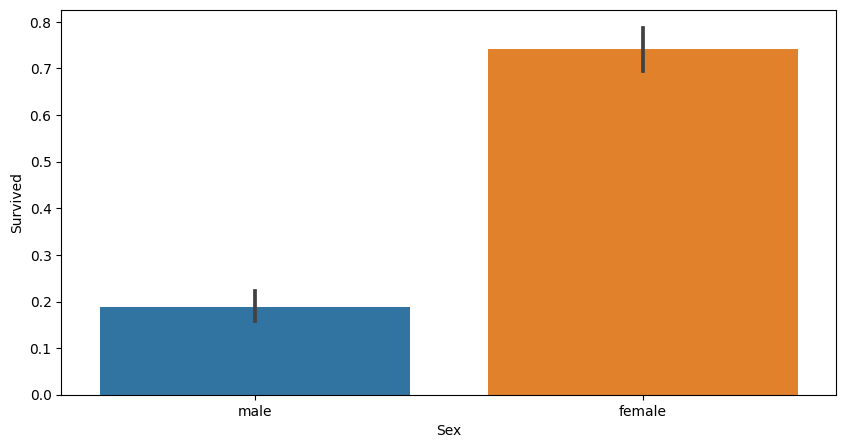

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Sex',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Pclass', ylabel='Survived'>

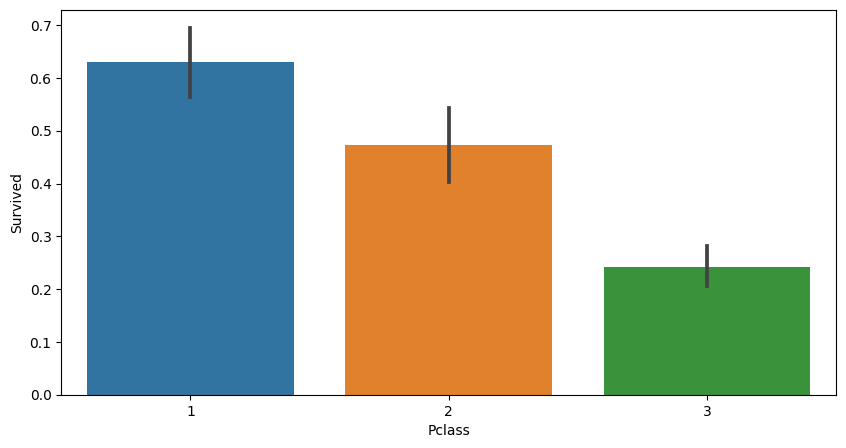

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Pclass',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Embarked', ylabel='Survived'>

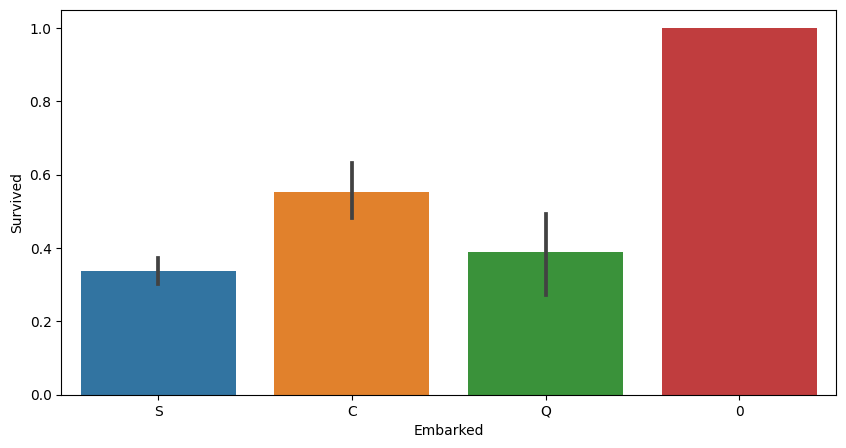

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Embarked',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Survived', ylabel='Age'>

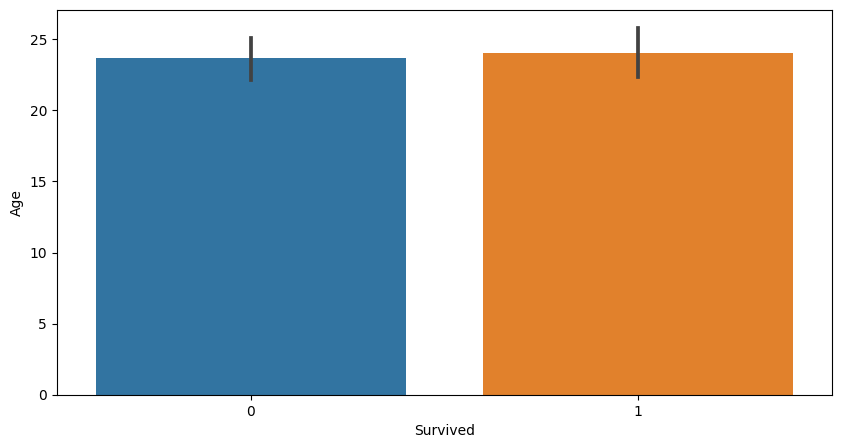

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Survived',
    y = 'Age',
    data = train_data
)

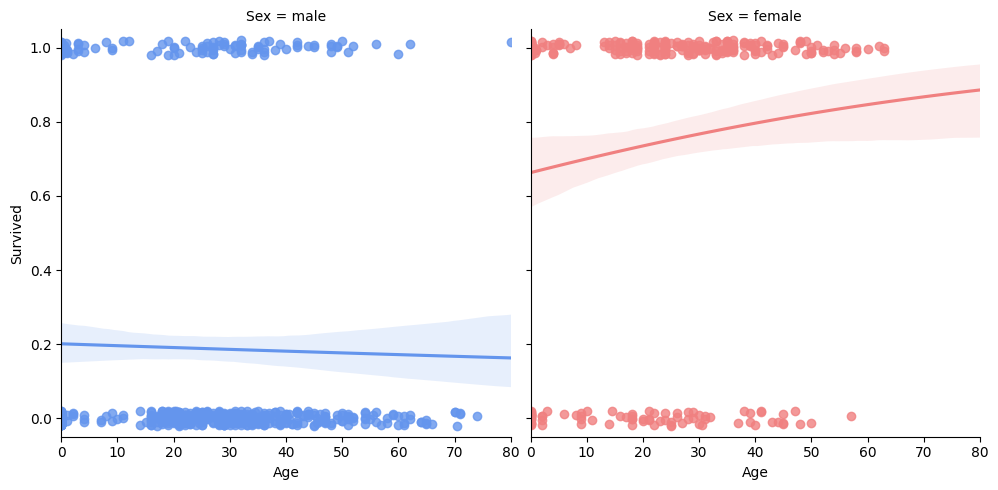

In [51]:

pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=train_data,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))


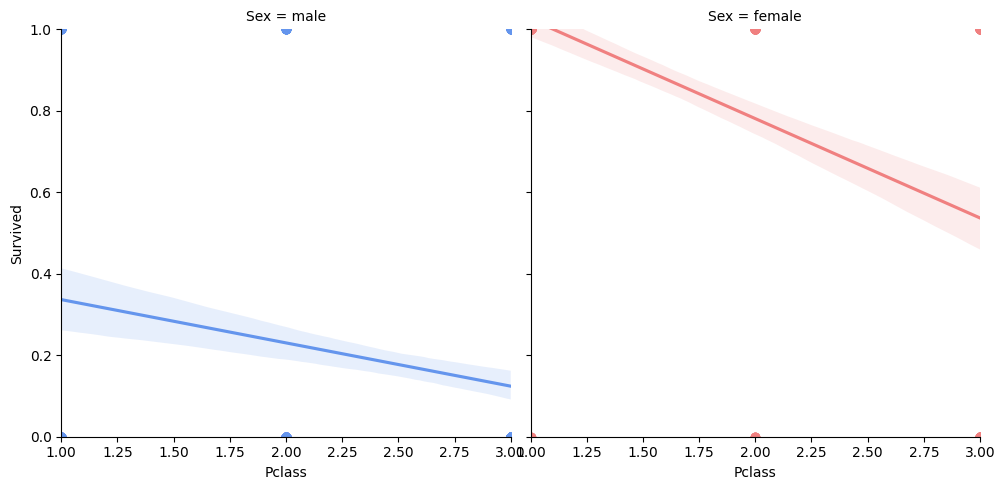

In [60]:
pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Pclass", y="Survived", col="Sex", hue="Sex", data=train_data,
               palette=pal)
g.set(xlim=(1, 3), ylim=(0, 1))

La probabilidad de sobrevivencia para los hombres en primera clase esta cercana al 35%, de segunda clase sobrepasa el 20% y para la tercera clase es inferior al 20%.
Con respecto al sexo feminino, la probabiida de supervivencia en la primera clase es cercana al 100%, la segunda clase cercana al 80% y la tercera clase cercana al 60%.
Podemos concluir que la probabilidad mas baja de sobrevivencia en las mujeres, es superior al mejor caso de probabilidad de los hombres.
